In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z, dtype=float)))

In [3]:
# Function to normalize features to zero mean and unit variance
def normalize_features(X):
    X_normalized = X.copy()
    X_normalized[:, 0] = (X[:, 0] == 'Male').astype(float) 
    for i in [1, 2]: 
        mean = np.mean(X[:, i])
        std = np.std(X[:, i])
        X_normalized[:, i] = (X[:, i] - mean) / std
    
    return X_normalized.astype(float)

In [4]:
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
def fit_logistic_regression(X, y, learning_rate=0.1, num_epochs=10):

    n_samples, n_features = X.shape
    np.random.seed(42)
    weights = np.random.randn(n_features).astype(float) * 0.01
    print(weights)
    bias = 0.0 
    y = y.astype(float)
    for epoch in range(num_epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
 
        loss = binary_cross_entropy_loss(y, y_pred)
        dz = y_pred - y
        dw = (1/n_samples) * np.dot(X.T, dz)
        db = (1/n_samples) * np.sum(dz)
   
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if epoch % 2 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return weights, bias

In [6]:
# Function to make predictions using the learned weights
# Adds bias term and computes predictions
def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int), probabilities

In [7]:
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

Epoch 0, Loss: 0.6926
Epoch 2, Loss: 0.6601
Epoch 4, Loss: 0.6316
Epoch 6, Loss: 0.6065
Epoch 8, Loss: 0.5844

Model Performance Metrics:
Accuracy: 0.4800
Precision: 1.0000
Recall: 0.2778
F1-score: 0.4348


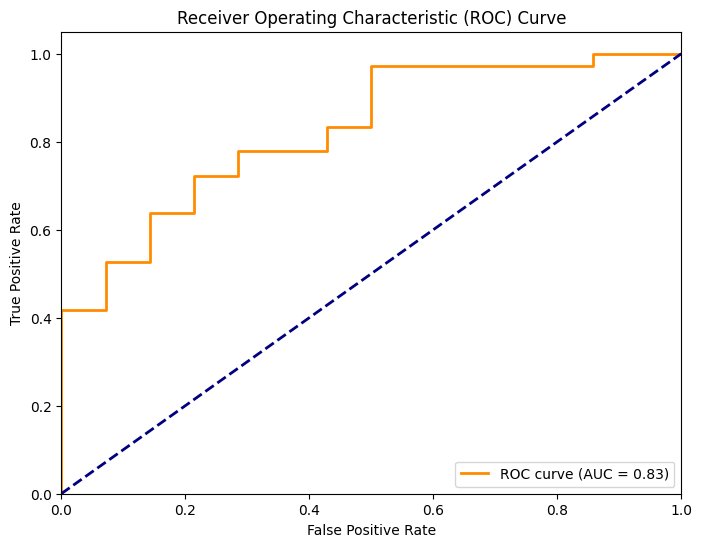

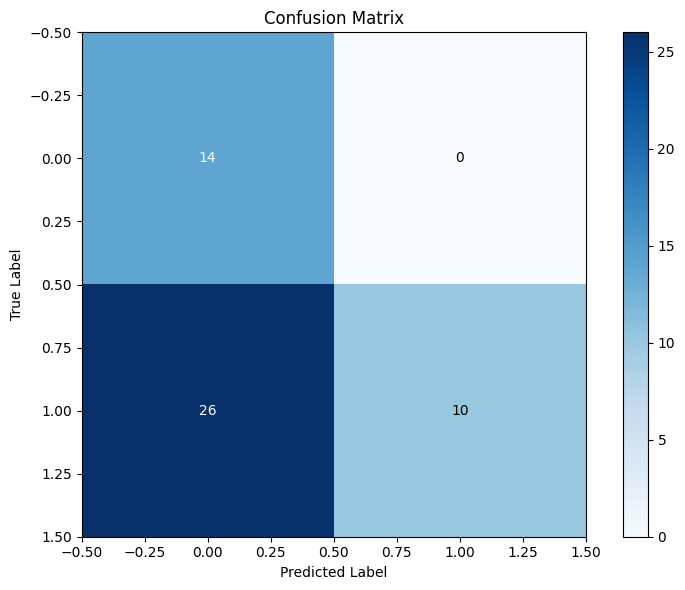

In [9]:
# Load training and testing datasets
if __name__ == "__main__":
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    X_train = train_data[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = train_data['Purchased'].values
    X_test = test_data[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = test_data['Purchased'].values

    X_train_normalized = normalize_features(X_train)
    X_test_normalized = normalize_features(X_test)

    weights, bias = fit_logistic_regression(X_train_normalized, y_train)

    y_pred, y_scores = predict(X_test_normalized, weights, bias)
   
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

    auc_score = plot_roc_curve(y_test, y_scores)

    plot_confusion_matrix(y_test, y_pred)